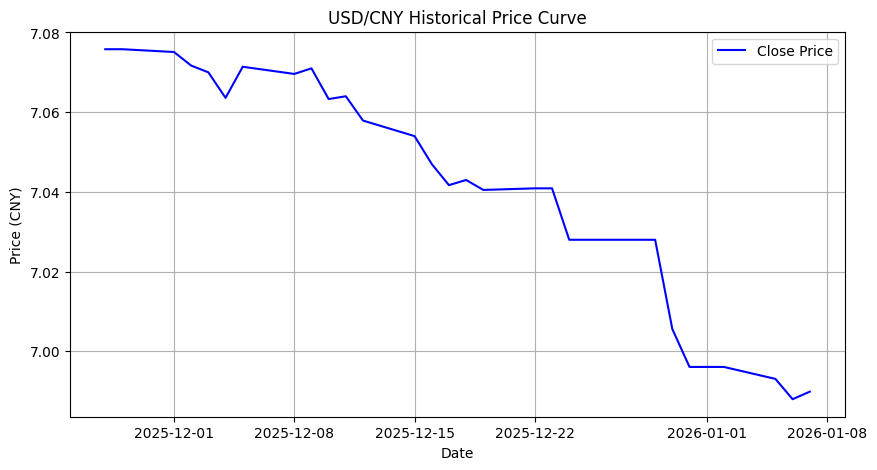

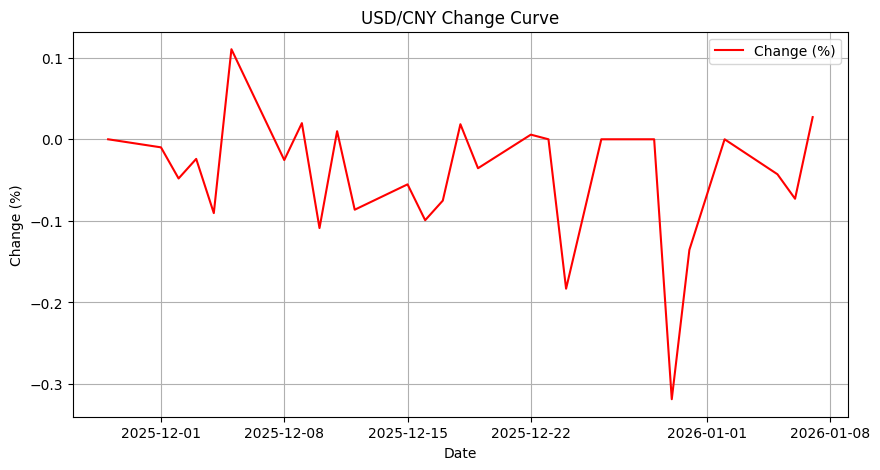

The most recent USD/CNY exchange rate is: 6.9899 CNY


/tmp/ipykernel_7899/764378637.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  recent_price = hist_data['Close'][-1]


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 设置美元兑人民币的汇率代码
ticker = "CNY=X"

# 获取指定天数的历史价格数据
def get_historical_data(days):
    # 创建Ticker对象
    currency = yf.Ticker(ticker)
    # 获取历史数据
    hist_data = currency.history(period=f"{days}d")
    return hist_data

# 绘制历史价格曲线
def plot_price_curve(hist_data):
    plt.figure(figsize=(10, 5))
    plt.plot(hist_data.index, hist_data['Close'], label="Close Price", color="blue")
    plt.title("USD/CNY Historical Price Curve")
    plt.xlabel("Date")
    plt.ylabel("Price (CNY)")
    plt.legend()
    plt.grid(True)
    plt.show()

# 计算涨跌幅并绘制涨跌幅曲线
def plot_change_curve(hist_data):
    # 计算涨跌幅
    hist_data['Change'] = hist_data['Close'].pct_change() * 100
    # 绘制涨跌幅曲线
    plt.figure(figsize=(10, 5))
    plt.plot(hist_data.index, hist_data['Change'], label="Change (%)", color="red")
    plt.title("USD/CNY Change Curve")
    plt.xlabel("Date")
    plt.ylabel("Change (%)")
    plt.legend()
    plt.grid(True)
    plt.show()
    # 保存涨跌幅数据到CSV文件
    hist_data[['Change']].to_csv("USD_CNY_Change_Curve.csv")

# 打印最近价格信息
def print_recent_price(hist_data):
    recent_price = hist_data['Close'][-1]
    print(f"The most recent USD/CNY exchange rate is: {recent_price:.4f} CNY")

# 主程序
if __name__ == "__main__":
    #days = int(input("Enter the number of historical days you want to analyze: "))
    days = 30
    hist_data = get_historical_data(days)
    plot_price_curve(hist_data)
    plot_change_curve(hist_data)
    print_recent_price(hist_data)